# Project 4: Clustering Video Games

## The goal

For this project, I wanted to see what genres, tags, and themese were commonly found in the same video game.

## The Data
I used a Steam Games dataset containing thousands of games found on site, and included data on the genres, tags, and categories of each game. This data also includes columns on play time, which is in mintues, hte languages the game is available in, and more.

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gower

In [42]:
df = pd.read_csv("games.csv")

## Preprocessing

This is a very large dataset and some rows may not be that useful to cluster. First, I removed games with a null genres, as the genre column would be essential in the clustering. I also remvoed games with a small median playtime, as it seemed like some games were not played.

In [43]:
df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71711,2159120,SUR5,"Apr 1, 2023",0 - 0,0,0,0.00,0,"Innovative Gameplay SUR5 brings a brand new, f...","['English', 'Polish', 'Spanish - Latin America']",...,0,0,0,Katharsis,Katharsis,"Single-player,Multi-player,PvP,Online PvP,Stea...","Free to Play,Indie,Massively Multiplayer,Strat...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71712,2125160,Prison Life 2,"Mar 30, 2023",0 - 20000,6,0,10.79,0,Core Features Real players only! All Guards an...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,AO Games,AO Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Casual,Indie,RPG,Simulation,Strategy","First-Person,Detective,Social Deduction,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71713,2318860,Architecture Zeitgeist,"Mar 27, 2023",0 - 20000,0,0,5.99,0,Architecture Zeitgeist is a game created with ...,"['English', 'Japanese', 'Portuguese - Brazil',...",...,0,0,0,Matheus Rudo,Rudo Studios,Single-player,"Casual,Simulation,Early Access","Casual,Simulation,Puzzle,Exploration,Immersive...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71714,2180330,Girl's Way to Survive 2: Bloody Museum,"Apr 2, 2023",0 - 0,0,0,2.39,0,"Development progress: prologue map (finished),...",['Simplified Chinese'],...,0,0,0,绅士游戏工坊,绅士游戏工坊,Single-player,"Action,Casual,Indie,RPG,Early Access",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [44]:
df.describe()

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,7.171600e+04,71716.000000,71716.000000,71716.000000,71716.000000,71716.000000,71716.000000,7.171600e+04,71716.000000,42.000000,71716.000000,7.171600e+04,71716.000000,71716.000000,71716.000000,71716.000000
mean,1.199222e+06,140.761197,0.343494,7.223055,0.615386,3.834207,0.044969,1.114753e+03,182.115525,98.904762,21.641977,8.981185e+02,119.158709,11.734690,106.873738,12.580833
std,5.982238e+05,5797.005513,2.362128,11.072051,14.932853,16.437707,1.901272,2.652246e+04,4975.205765,0.878178,185.583590,1.947627e+04,1230.102924,203.818348,1641.336319,221.150372
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.005350e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.176745e+06,0.000000,0.000000,4.990000,0.000000,0.000000,0.000000,9.000000e+00,3.000000,99.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.692255e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,5.900000e+01,18.000000,100.000000,19.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.379920e+06,872138.000000,21.000000,999.000000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [45]:
df.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64
Recommendati

In [46]:
df.isnull().sum()

AppID                             0
Name                              1
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 2436
Supported languages               0
Full audio languages              0
Reviews                       62549
Header image                      0
Website                       36643
Support url                   35466
Support email                 11120
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                67938
User score                        0
Positive                          0
Negative                          0
Score rank                    71674
Achievements                      0
Recommendations                   0
Notes                       

In [47]:
df_filtered = df.dropna(subset=['Genres'])
df_filtered.isnull().sum()

AppID                             0
Name                              0
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                   79
Supported languages               0
Full audio languages              0
Reviews                       60118
Header image                      0
Website                       34251
Support url                   33084
Support email                  8721
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                65504
User score                        0
Positive                          0
Negative                          0
Score rank                    69235
Achievements                      0
Recommendations                   0
Notes                       

In [48]:
df_filtered

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71711,2159120,SUR5,"Apr 1, 2023",0 - 0,0,0,0.00,0,"Innovative Gameplay SUR5 brings a brand new, f...","['English', 'Polish', 'Spanish - Latin America']",...,0,0,0,Katharsis,Katharsis,"Single-player,Multi-player,PvP,Online PvP,Stea...","Free to Play,Indie,Massively Multiplayer,Strat...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71712,2125160,Prison Life 2,"Mar 30, 2023",0 - 20000,6,0,10.79,0,Core Features Real players only! All Guards an...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,AO Games,AO Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Casual,Indie,RPG,Simulation,Strategy","First-Person,Detective,Social Deduction,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71713,2318860,Architecture Zeitgeist,"Mar 27, 2023",0 - 20000,0,0,5.99,0,Architecture Zeitgeist is a game created with ...,"['English', 'Japanese', 'Portuguese - Brazil',...",...,0,0,0,Matheus Rudo,Rudo Studios,Single-player,"Casual,Simulation,Early Access","Casual,Simulation,Puzzle,Exploration,Immersive...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71714,2180330,Girl's Way to Survive 2: Bloody Museum,"Apr 2, 2023",0 - 0,0,0,2.39,0,"Development progress: prologue map (finished),...",['Simplified Chinese'],...,0,0,0,绅士游戏工坊,绅士游戏工坊,Single-player,"Action,Casual,Indie,RPG,Early Access",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [49]:
#function to turn estimated players into a number
#splits the a string range in the form  "x - y" into two integers x and y, then returns the average of the two integers
def players(estimated):
    a = estimated.split(" - ")

    b1 = int(a[0])
    b2 = int(a[1])

    c = (b1 + b2) / 2
    return int(c)

#apply the function players to the column 'Estimated owners'
df_filtered['Estimated owners'] = df_filtered['Estimated owners'].apply(players)

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\3692014211.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Estimated owners'] = df_filtered['Estimated owners'].apply(players)


In [50]:
df_filtered = df_filtered[df_filtered['Median playtime forever'] >= 60]

In [51]:
df_filtered

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
9,320150,Deadlings: Rotten Edition,"Nov 11, 2014",75000,0,0,3.99,0,Death is lonely. He has zero friends on his Fa...,"['English', 'Polish', 'French', 'Italian', 'Ge...",...,0,782,0,ONE MORE LEVEL,ONE MORE LEVEL,"Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Indie","Action,Indie,Adventure,Puzzle-Platformer,Arcad...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
10,1026420,WARSAW,"Oct 2, 2019",35000,5,0,23.99,0,Use everything at your disposal to help a team...,"['English', 'French', 'German', 'Polish', 'Rus...",...,0,93,0,Pixelated Milk,"Pixelated Milk,gaming company","Single-player,Steam Achievements,Steam Trading...","Indie,RPG","Tactical RPG,Turn-Based Strategy,Wargame,Histo...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
11,485000,Cthulhu Realms,"Jul 1, 2016",75000,0,0,0.00,1,Star Realms has gone insane! Introducing Cthul...,['English'],...,0,257,0,"Wise Wizard Games, LLC","Wise Wizard Games, LLC","Single-player,Multi-player,Shared/Split Screen...",Strategy,"Card Game,Strategy,Deckbuilding,Lovecraftian,B...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
17,346560,Hero of the Kingdom II,"Feb 20, 2015",150000,5,0,7.99,0,Sail to the farthest islands to save your sist...,"['English', 'French', 'German', 'Spanish - Spa...",...,0,303,0,Lonely Troops,Lonely Troops,"Single-player,Steam Achievements,Steam Trading...","Adventure,Casual,Indie,RPG","Adventure,Casual,Point & Click,RPG,Indie,Isome...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
21,575760,Project: R.E.B.O.O.T 2,"Jan 27, 2017",35000,10,0,2.99,0,Meet the continuation of the hardcore platform...,['English'],...,0,289,0,Volens Nolens Games,Volens Nolens Games,"Single-player,Steam Trading Cards","Action,Adventure,Casual,Indie","Action,Adventure,Casual,Indie,Platformer,2D Pl...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71584,768200,Smalland: Survive the Wilds,"Mar 29, 2023",150000,11894,0,22.49,0,"'Before the time of the giants, we lived freel...","['English', 'French', 'German', 'Spanish - Spa...",...,199,199,199,Merge Games,Merge Games,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure,Indie,RPG,Early Access","Early Access,Survival,Open World Survival Craf...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71615,2138710,Sifu,"Mar 28, 2023",75000,2196,17,35.99,3,Whether you choose to play as a male or a fema...,"['English', 'French', 'Italian', 'German', 'Sp...",...,87,95,95,Sloclap,"Sloclap,Kepler Interactive","Single-player,Steam Achievements,Full controll...","Action,Indie","Action,Beat 'em up,Third Person,Difficult,Mart...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71653,1562430,DREDGE,"Mar 30, 2023",150000,10464,0,24.99,3,Captain your fishing trawler to explore a coll...,"['English', 'French', 'Italian', 'German', 'Sp...",...,182,182,182,Black Salt Games,Team17,"Single-player,Steam Achievements,Full controll...","Adventure,RPG","Fishing,Exploration,Adventure,Lovecraftian,Mys...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71667,1888930,The Last of Us™ Part I,"Mar 28, 2023",750000,17498,17,59.99,0,Experience the emotional storytelling and unfo...,"['English', 'Italian', 'Spanish - Spain', 'Cze...",...,592,797,797,Naughty Dog LLC,PlayStation PC LLC,"Singl

In [52]:
df_filtered.describe()

,AppID,Estimated owners,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,1.099500e+04,1.099500e+04,10995.000000,10995.000000,10995.000000,10995.000000,10995.000000,10995.000000,1.099500e+04,10995.000000,12.000000,10995.000000,1.099500e+04,10995.000000,10995.000000,10995.000000,10995.000000
mean,6.223164e+05,4.997917e+05,888.052933,1.125057,12.108367,2.313597,18.483220,0.083402,6.665471e+03,1043.125784,99.000000,40.080764,5.182962e+03,755.227103,72.229377,689.925239,77.317326
std,4.207595e+05,2.762727e+06,14781.578636,4.184235,12.186993,35.239471,32.397156,2.587992,6.714684e+04,12600.508646,0.953463,211.507701,4.630498e+04,3054.233395,474.745588,4143.820298,520.409650
min,1.000000e+01,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,31.000000,0.000000,60.000000,0.000000
25%,3.316050e+05,3.500000e+04,1.000000,0.000000,2.990000,0.000000,0.000000,0.000000,1.270000e+02,36.000000,98.750000,0.000000,0.000000e+00,167.000000,0.000000,168.000000,0.000000
50%,4.978000e+05,7.500000e+04,4.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.800000e+02,108.000000,99.000000,20.000000,4.060000e+02,267.000000,0.000000,262.000000,0.000000
75%,8.449250e+05,3.500000e+05,37.000000,0.000000,17.990000,1.000000,10.000000,0.000000,1.924500e+03,355.500000,100.000000,39.000000,1.669000e+03,520.000000,0.000000,461.000000,0.000000
max,2.262770e+06,1.500000e+08,872138.000000,21.000000,299.900000,2366.000000,97.000000,98.000000,5.764420e+06,895978.000000,100.000000,5394.000000,3.441592e+06,145727.000000,10996.000000,208473.000000,10996.000000


In [53]:
df_filtered.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners                int64
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64
Recommendati

In [54]:
df_filtered.drop(columns=['Website', 'Header image', 'Support url', 'Support email', 'Metacritic url', 'Screenshots', 'Movies', 'Notes'], inplace=True)

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\3475179065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['Website', 'Header image', 'Support url', 'Support email', 'Metacritic url', 'Screenshots', 'Movies', 'Notes'], inplace=True)


In [55]:
df_filtered.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners                int64
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64
Recommendations                 int64
Average playtime forever        int64
Average playtime two weeks      int64
Median playtime forever         int64
Median playtime two weeks       int64
Developers  

In [56]:
df_filtered['Genres'] = df_filtered['Genres'].apply(lambda x: x.split(","))
df_filtered['Tags'] = df_filtered['Tags'].apply(lambda x: str(x))
df_filtered['Tags'] = df_filtered['Tags'].apply(lambda x: x.split(","))
df_filtered['Categories'] = df_filtered['Categories'].apply(lambda x: str(x))
df_filtered['Categories'] = df_filtered['Categories'].apply(lambda x: x.split(","))

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\3876239254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Genres'] = df_filtered['Genres'].apply(lambda x: x.split(","))
C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\3876239254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Tags'] = df_filtered['Tags'].apply(lambda x: str(x))
C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\3876239254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [57]:
#this kernel is from a chatgpt reccommendation
unique_genres = set()
for genres in df_filtered['Genres']:
    unique_genres.update(genres)

{'Audio Production', 'Free to Play', 'Web Publishing', 'Game Development', 'Software Training', 'Sexual Content', 'Nudity', 'Simulation', 'RPG', 'Gore', 'Strategy', 'Early Access', 'Massively Multiplayer', 'Accounting', 'Sports', 'Violent', 'Animation & Modeling', 'Action', 'Photo Editing', 'Indie', 'Video Production', 'Education', 'Utilities', 'Design & Illustration', 'Casual', 'Adventure', 'Racing'}


## Visualizations

After preprocessing the data, the first thing I did was visualize the 'Genres', 'Categories', and 'Tags' columns to see what were the moest common entries within those columns.

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\3542770344.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts_df, x='Genre', y='Count', palette='viridis')


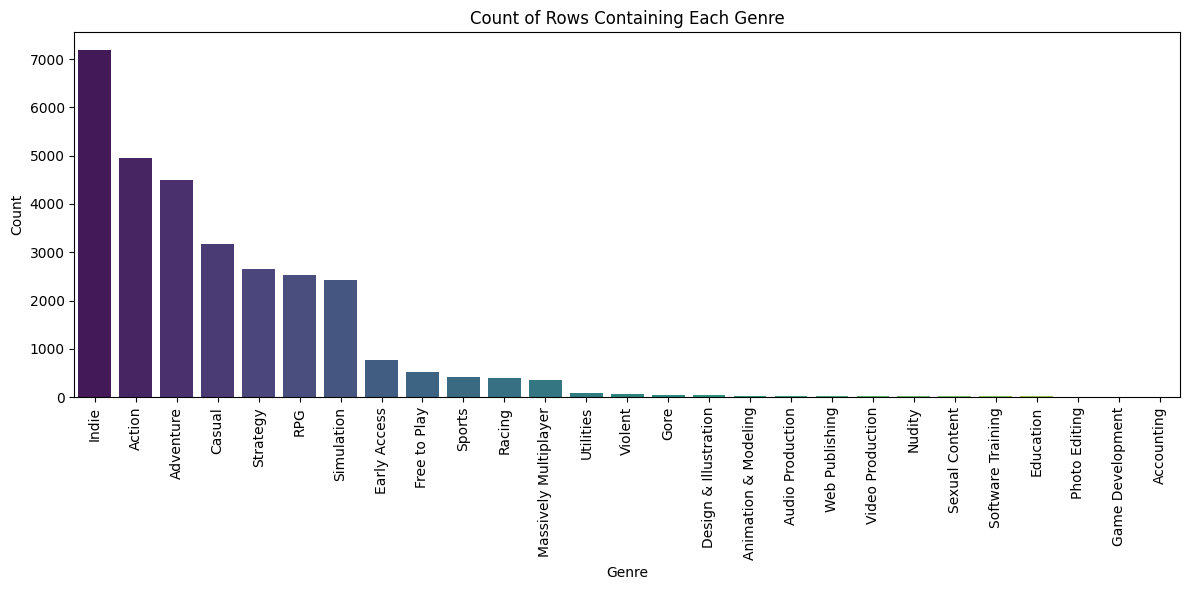

In [58]:
# Count how many times each genre appears in any list
genre_counts = {genre: df_filtered['Genres'].apply(lambda x: genre in x).sum() for genre in unique_genres}

# Convert to a DataFrame for easier plotting
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Sort by count for a cleaner plot
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts_df, x='Genre', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Genre')
plt.tight_layout()
plt.show()

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\2911628753.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_counts_df, x='Tag', y='Count', palette='viridis')


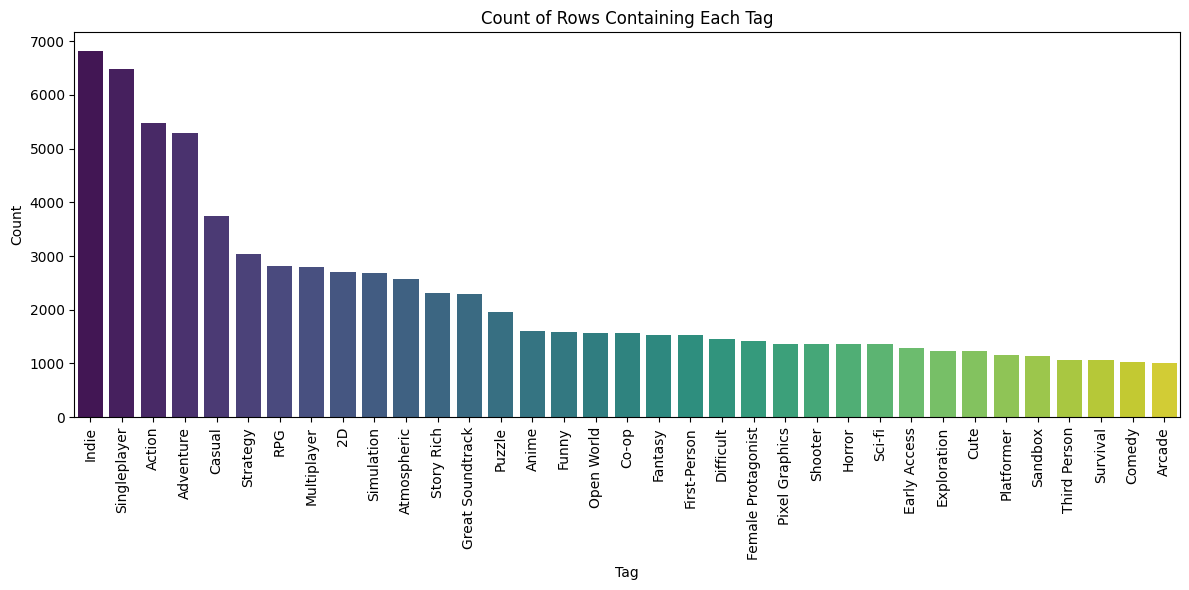

In [59]:
# Count how many times each genre appears in any list
unique_tags = set()
for tags in df_filtered['Tags']:
    unique_tags.update(tags)

# Count how many times each genre appears in any list
tag_counts = {genre: df_filtered['Tags'].apply(lambda x: genre in x).sum() for genre in unique_tags}

# Convert to a DataFrame for easier plotting
tag_counts_df = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Count'])

# Sort by count for a cleaner plot
tag_counts_df = tag_counts_df.sort_values(by='Count', ascending=False)
tag_counts_df = tag_counts_df[tag_counts_df['Count'] >= 1000]

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=tag_counts_df, x='Tag', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Tag')
plt.tight_layout()
plt.show()

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\3367019693.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_counts_df, x='Category', y='Count', palette='viridis')


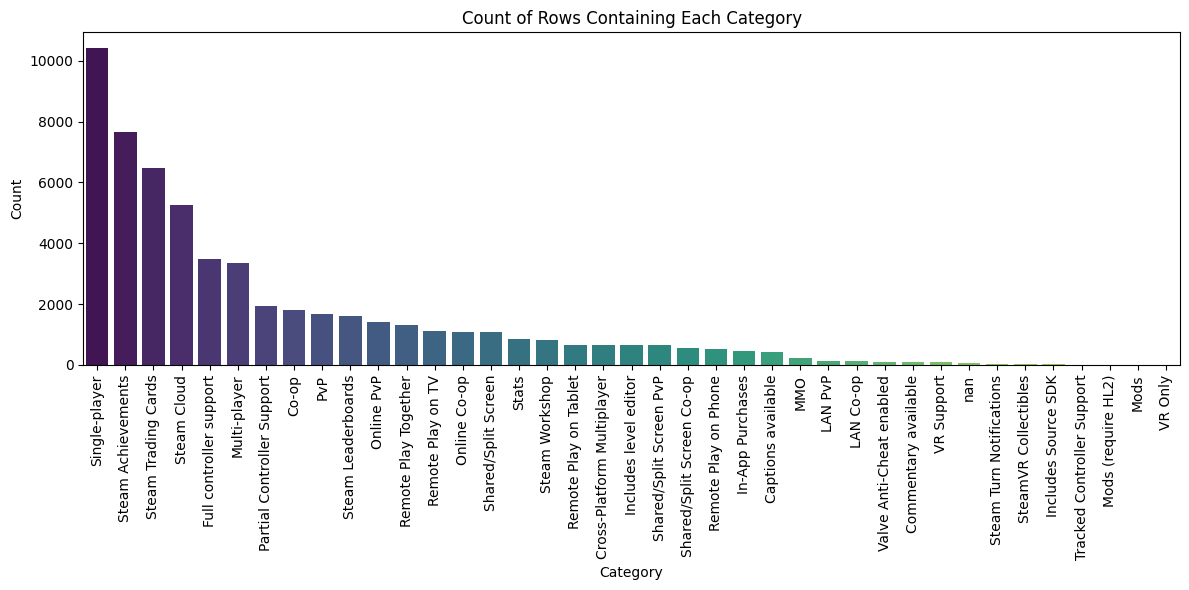

In [60]:
# Count how many times each genre appears in any list
unique_categories = set()
for tags in df_filtered['Categories']:
    unique_categories.update(tags)

# Count how many times each genre appears in any list
cat_counts = {genre: df_filtered['Categories'].apply(lambda x: genre in x).sum() for genre in unique_categories}

# Convert to a DataFrame for easier plotting
cat_counts_df = pd.DataFrame(list(cat_counts.items()), columns=['Category', 'Count'])

# Sort by count for a cleaner plot
cat_counts_df = cat_counts_df.sort_values(by='Count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=cat_counts_df, x='Category', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Category')
plt.tight_layout()
plt.show()

In [61]:
#puts date into a yyyy-mm-dd format
df_filtered['Release date'] = pd.to_datetime(df_filtered['Release date'], errors='coerce')

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\3501572878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Release date'] = pd.to_datetime(df_filtered['Release date'], errors='coerce')


In [62]:
for col in df_filtered.columns:
    print(f"{col}: {df_filtered[col].dtype}")

AppID: int64
Name: object
Release date: datetime64[ns]
Estimated owners: int64
Peak CCU: int64
Required age: int64
Price: float64
DLC count: int64
About the game: object
Supported languages: object
Full audio languages: object
Reviews: object
Windows: bool
Mac: bool
Linux: bool
Metacritic score: int64
User score: int64
Positive: int64
Negative: int64
Score rank: float64
Achievements: int64
Recommendations: int64
Average playtime forever: int64
Average playtime two weeks: int64
Median playtime forever: int64
Median playtime two weeks: int64
Developers: object
Publishers: object
Categories: object
Genres: object
Tags: object


## HDBSCAN Clustering

After looking at the visualizations, it was decided that clustering based on the 'Genres', 'Categories', and 'Tags'. First, I made the unique entries of those columns rows, and then used a method called "Gower distance" to find the distance between entries. Gower distance is an effective way to get distance for categorical data, which is why it was used. This created a gower density matrix, showing the distances between every row in the dataframe, which was then used to cluster the data. HDBSCAN was used as the clustering method because it can effectively get many clusters even when data may at first appear very similar. Originally, DBSCAN was going to be used, but with its singular epsiolon value there were only a few clusters, and most data was within one of the clusters. HDBSCAN is hierarchical, and can split largr clusters down by changing to a smaller epsilon value.

In [63]:
#dropping the columns that are not needed
list_of_columns = ['Genres', 'Categories', 'Tags']
df_clustered = df_filtered.copy()
for col in df_clustered.columns:
    if col not in list_of_columns:
        df_clustered.drop(col, axis=1, inplace=True)

df_clustered

,Categories,Genres,Tags
9,"[Single-player, Steam Achievements, Steam Trad...","[Action, Adventure, Indie]","[Action, Indie, Adventure, Puzzle-Platformer, ..."
10,"[Single-player, Steam Achievements, Steam Trad...","[Indie, RPG]","[Tactical RPG, Turn-Based Strategy, Wargame, H..."
11,"[Single-player, Multi-player, Shared/Split Scr...",[Strategy],"[Card Game, Strategy, Deckbuilding, Lovecrafti..."
17,"[Single-player, Steam Achievements, Steam Trad...","[Adventure, Casual, Indie, RPG]","[Adventure, Casual, Point & Click, RPG, Indie,..."
21,"[Single-player, Steam Trading Cards]","[Action, Adventure, Casual, Indie]","[Action, Adventure, Casual, Indie, Platformer,..."
...,...,...,...
71584,"[Single-player, Multi-player, Co-op, Online Co...","[Action, Adventure, Indie, RPG, Early Access]","[Early Access, Survival, Open World Survival C..."
71615,"[Single-player, Steam Achievements, Full contr...","[Action, Indie]","[Action, Beat 'em up, Third Person, Difficult,..."
71653,"[Single-player, Steam Achievements, Full contr...","[Adventure, RPG]","[Fishing, Exploration, Adventure, Lovecraftian..."
71667,"[Single-player, Steam Achievements, Full contr...","[Action, Adventure]","[Story Rich, Action, Zombies, Adventure, Singl..."


In [64]:
#there are many tags that are found in a few rows, so we will only keep the tags that are found in at least 1000 rows
type(tag_counts)
tag_counts_update = {}
updated_unique_tags = []

for key, val in tag_counts.items():
    if val >= 1000:
        tag_counts_update.update({key: val})
        updated_unique_tags.append(key)


{'Difficult': np.int64(1465),
 'Comedy': np.int64(1024),
 'Atmospheric': np.int64(2577),
 'Horror': np.int64(1363),
 'Arcade': np.int64(1012),
 'Sandbox': np.int64(1135),
 'Shooter': np.int64(1367),
 'Open World': np.int64(1574),
 'Cute': np.int64(1225),
 'Survival': np.int64(1057),
 'Female Protagonist': np.int64(1425),
 'Exploration': np.int64(1231),
 'Casual': np.int64(3740),
 'Indie': np.int64(6822),
 'Adventure': np.int64(5281),
 '2D': np.int64(2698),
 'Action': np.int64(5485),
 'Platformer': np.int64(1149),
 'Simulation': np.int64(2693),
 'Anime': np.int64(1610),
 'Singleplayer': np.int64(6482),
 'Strategy': np.int64(3033),
 'Third Person': np.int64(1059),
 'Sci-fi': np.int64(1359),
 'Pixel Graphics': np.int64(1369),
 'Co-op': np.int64(1559),
 'Puzzle': np.int64(1964),
 'RPG': np.int64(2818),
 'Early Access': np.int64(1283),
 'Funny': np.int64(1595),
 'Fantasy': np.int64(1535),
 'Story Rich': np.int64(2306),
 'Great Soundtrack': np.int64(2301),
 'First-Person': np.int64(1533),
 '

In [65]:
for tag in tag_counts_update.keys():
    df_clustered[tag] = df_clustered['Tags'].apply(lambda x: 1 if tag in x else 0)
df_clustered.drop(columns=['Tags'], inplace=True)

for genre in unique_genres:
    df_clustered[genre] = df_clustered['Genres'].apply(lambda x: 1 if genre in x else 0)
df_clustered.drop(columns=['Genres'], inplace=True)

for category in unique_categories:
    df_clustered[category] = df_clustered['Categories'].apply(lambda x: 1 if category in x else 0)  
df_clustered.drop(columns=['Categories'], inplace=True)

,Difficult,Comedy,Atmospheric,Horror,Arcade,Sandbox,Shooter,Open World,Cute,Survival,...,Mods,Steam Leaderboards,Stats,Online Co-op,Single-player,Steam Achievements,PvP,Remote Play on Phone,Cross-Platform Multiplayer,Captions available
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71584,0,0,0,0,0,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
71615,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
71653,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
71667,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [66]:
# Ensure all columns in df_clustered are of a compatible type for Gower distance calculation
df_clustered = df_clustered.astype(float)

# Calculate the Gower distance matrix
gower_dist_matrix = gower.gower_matrix(df_clustered)

In [67]:
#make DBSCAN clusters using the gower distance matrix
from sklearn.cluster import HDBSCAN

#min_cluster = 50, min_samples = 5, metric = 'precomputed', noise = 770
clusters = HDBSCAN(min_cluster_size=50, min_samples=5, metric='precomputed').fit(gower_dist_matrix)


In [68]:
labels = clusters.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 11
Estimated number of noise points: 770


In [69]:
df_filtered['Cluster'] = clusters.labels_

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\3100840145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = clusters.labels_


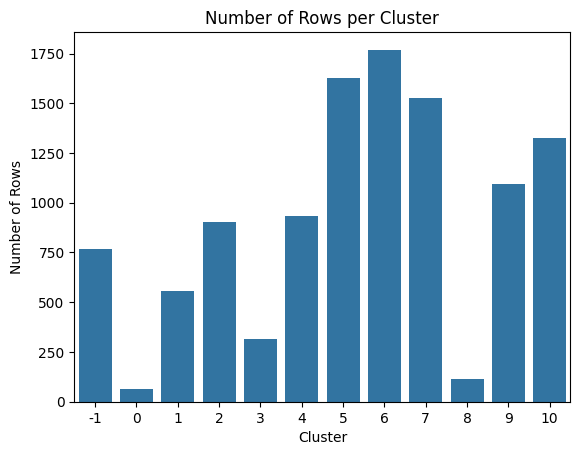

In [70]:
# Count number of rows per cluster
cluster_counts = df_filtered['Cluster'].value_counts().sort_index()

# Plot bar chart
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Cluster')
plt.show()

In [217]:
#look into clusters 2, 6, and 9, these clusters show the most contrasting data

df_c3 = df_filtered[df_filtered['Cluster'] == 2]
df_c7 = df_filtered[df_filtered['Cluster'] == 6]
df_c10 = df_filtered[df_filtered['Cluster'] == 9]

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\3780480108.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts_df, x='Genre', y='Count', palette='viridis')


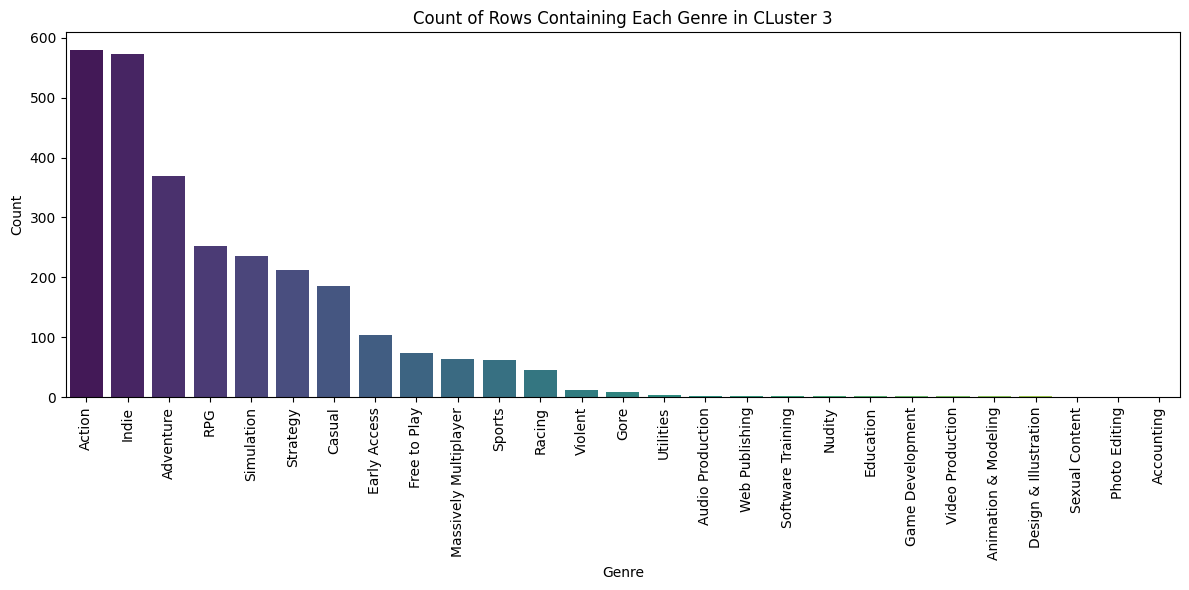

In [218]:
# Count how many times each genre appears in any list
genre_counts = {genre: df_c3['Genres'].apply(lambda x: genre in x).sum() for genre in unique_genres}

# Convert to a DataFrame for easier plotting
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Sort by count for a cleaner plot
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts_df, x='Genre', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Genre in CLuster 3')
plt.tight_layout()
plt.show()

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\1931631848.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts_df, x='Genre', y='Count', palette='viridis')


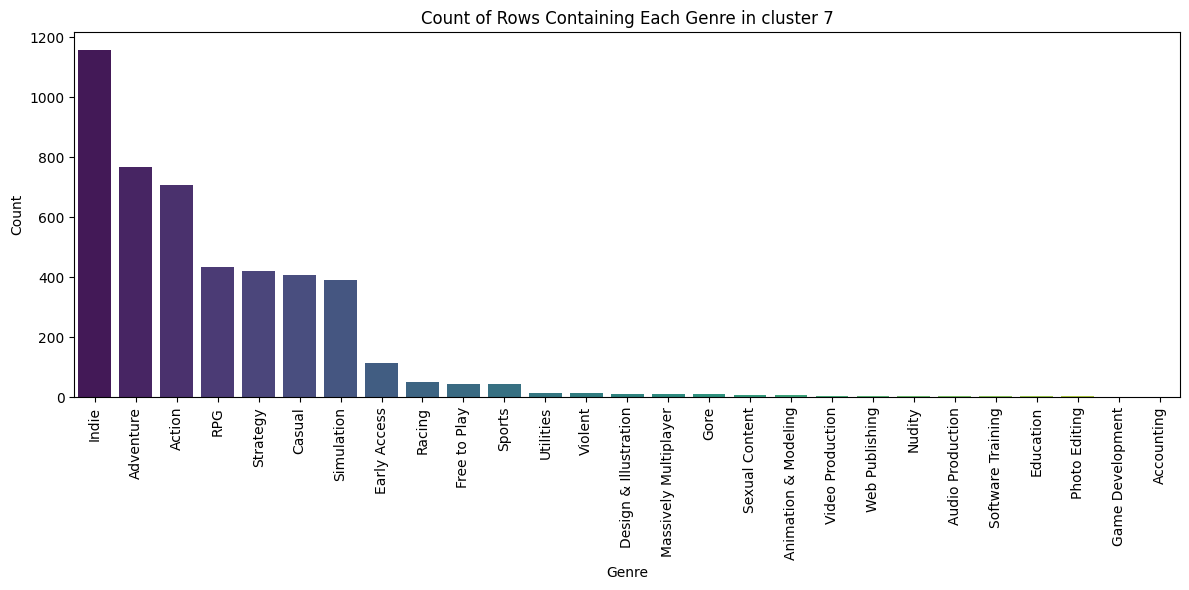

In [219]:
# Count how many times each genre appears in any list
genre_counts = {genre: df_c7['Genres'].apply(lambda x: genre in x).sum() for genre in unique_genres}

# Convert to a DataFrame for easier plotting
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Sort by count for a cleaner plot
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts_df, x='Genre', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Genre in cluster 7')
plt.tight_layout()
plt.show()

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\4032313366.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts_df, x='Genre', y='Count', palette='viridis')


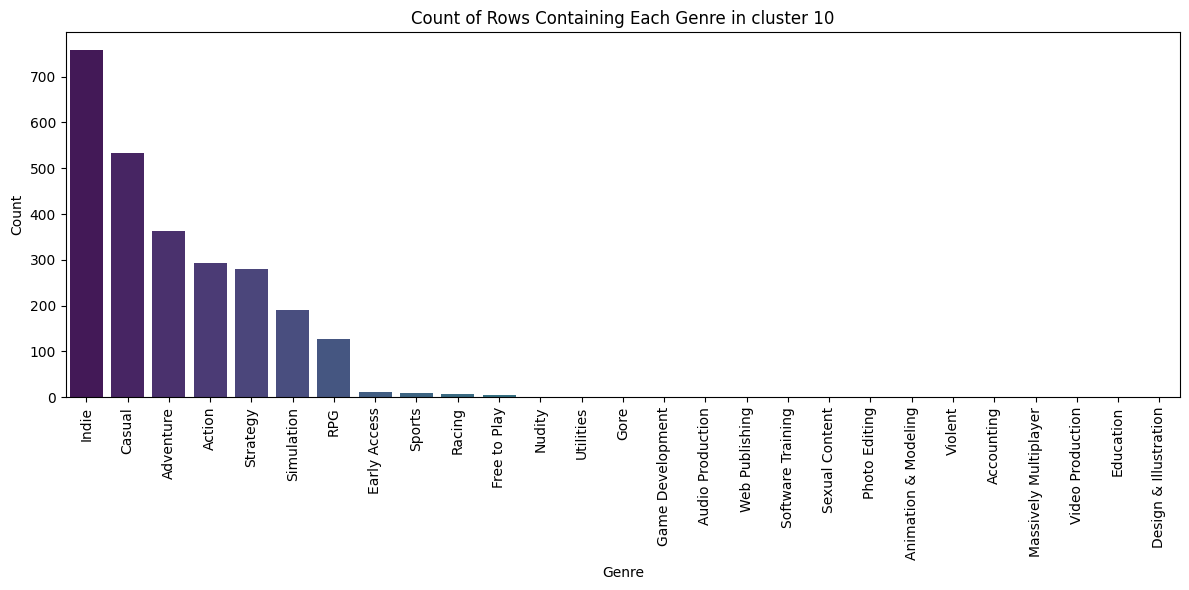

In [220]:
# Count how many times each genre appears in any list
genre_counts = {genre: df_c10['Genres'].apply(lambda x: genre in x).sum() for genre in unique_genres}

# Convert to a DataFrame for easier plotting
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Sort by count for a cleaner plot
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts_df, x='Genre', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Genre in cluster 10')
plt.tight_layout()
plt.show()

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\2819174540.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_counts_df, x='Tag', y='Count', palette='viridis')


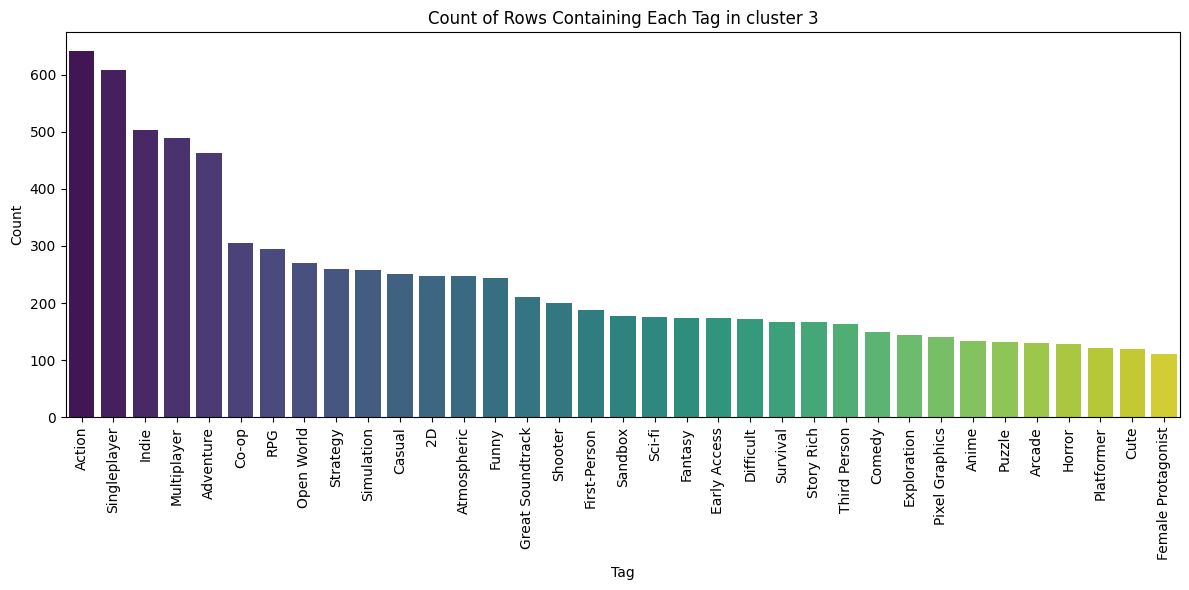

In [221]:
tag_counts = {genre: df_c3['Tags'].apply(lambda x: genre in x).sum() for genre in updated_unique_tags}

# Convert to a DataFrame for easier plotting
tag_counts_df = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Count'])

# Sort by count for a cleaner plot
tag_counts_df = tag_counts_df.sort_values(by='Count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=tag_counts_df, x='Tag', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Tag in cluster 3')
plt.tight_layout()
plt.show()

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\394955332.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_counts_df, x='Tag', y='Count', palette='viridis')


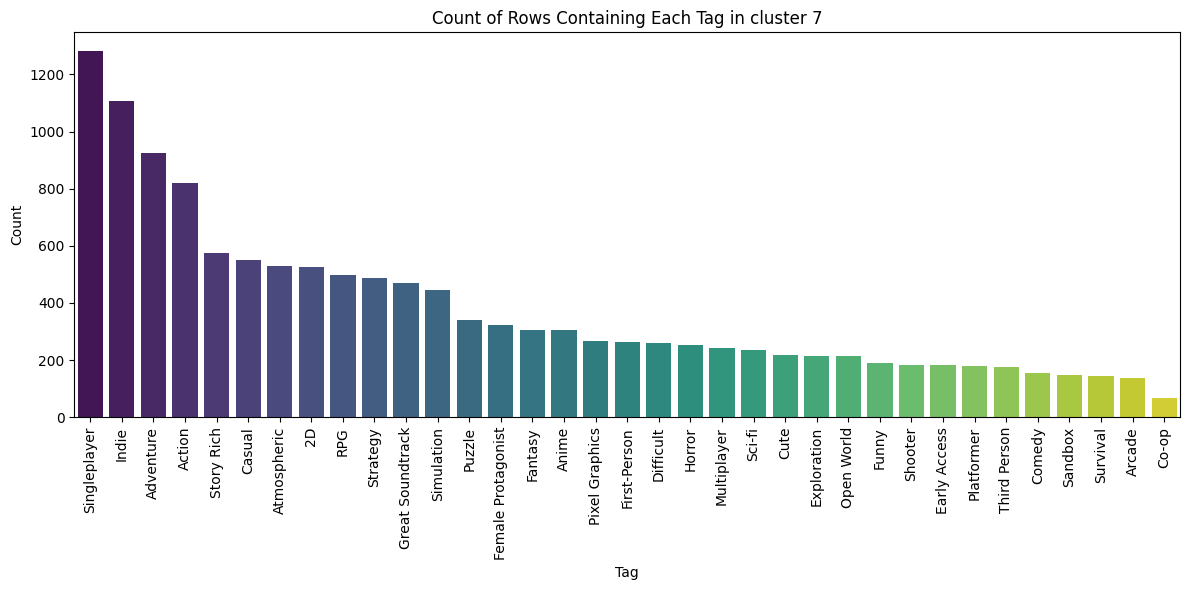

In [222]:
tag_counts = {genre: df_c7['Tags'].apply(lambda x: genre in x).sum() for genre in updated_unique_tags}

# Convert to a DataFrame for easier plotting
tag_counts_df = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Count'])

# Sort by count for a cleaner plot
tag_counts_df = tag_counts_df.sort_values(by='Count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=tag_counts_df, x='Tag', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Tag in cluster 7')
plt.tight_layout()
plt.show()

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\1886469422.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_counts_df, x='Tag', y='Count', palette='viridis')


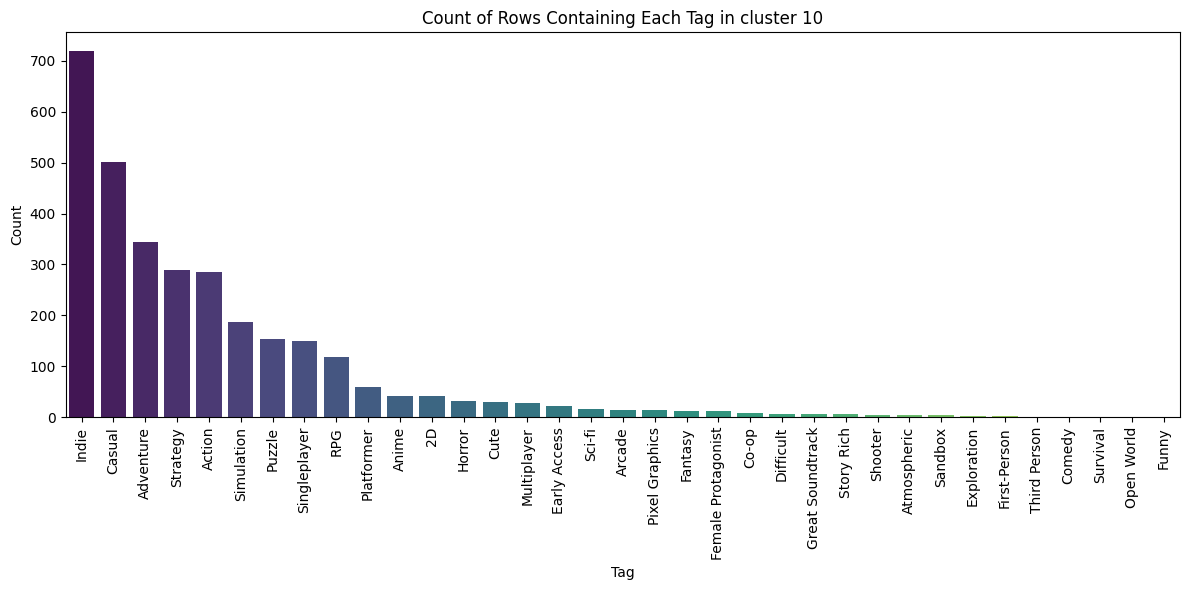

In [223]:
tag_counts = {genre: df_c10['Tags'].apply(lambda x: genre in x).sum() for genre in updated_unique_tags}

# Convert to a DataFrame for easier plotting
tag_counts_df = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Count'])

# Sort by count for a cleaner plot
tag_counts_df = tag_counts_df.sort_values(by='Count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=tag_counts_df, x='Tag', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Tag in cluster 10')
plt.tight_layout()
plt.show()

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\881278355.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_counts_df, x='Category', y='Count', palette='viridis')


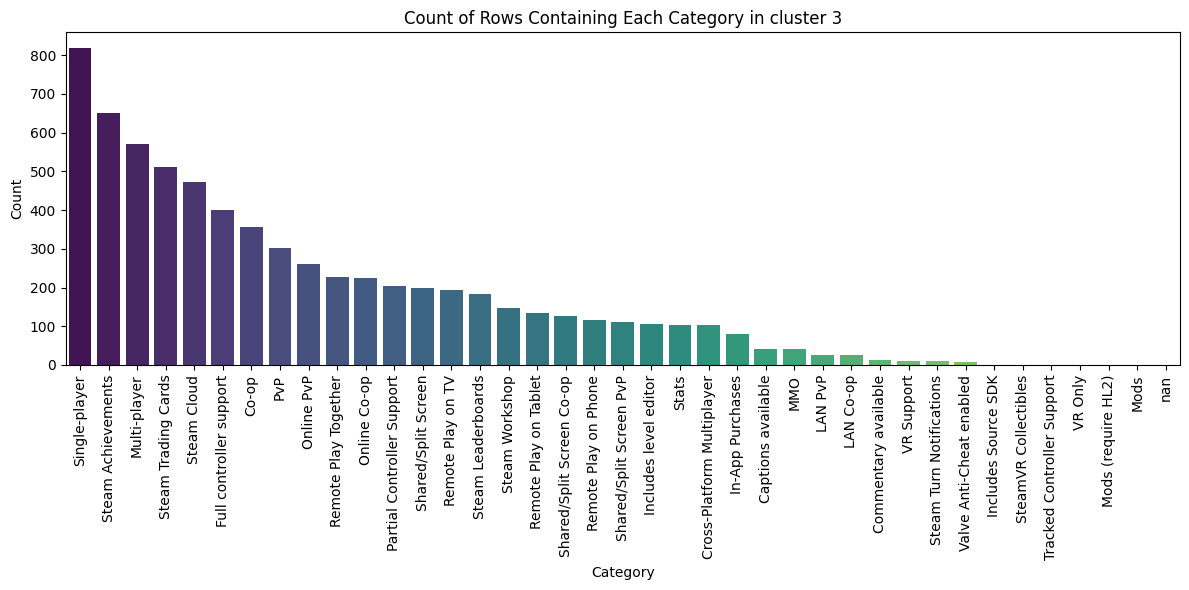

In [224]:
# Count how many times each genre appears in any list
cat_counts = {genre: df_c3['Categories'].apply(lambda x: genre in x).sum() for genre in unique_categories}

# Convert to a DataFrame for easier plotting
cat_counts_df = pd.DataFrame(list(cat_counts.items()), columns=['Category', 'Count'])

# Sort by count for a cleaner plot
cat_counts_df = cat_counts_df.sort_values(by='Count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=cat_counts_df, x='Category', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Category in cluster 3')
plt.tight_layout()
plt.show()

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\3814610495.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_counts_df, x='Category', y='Count', palette='viridis')


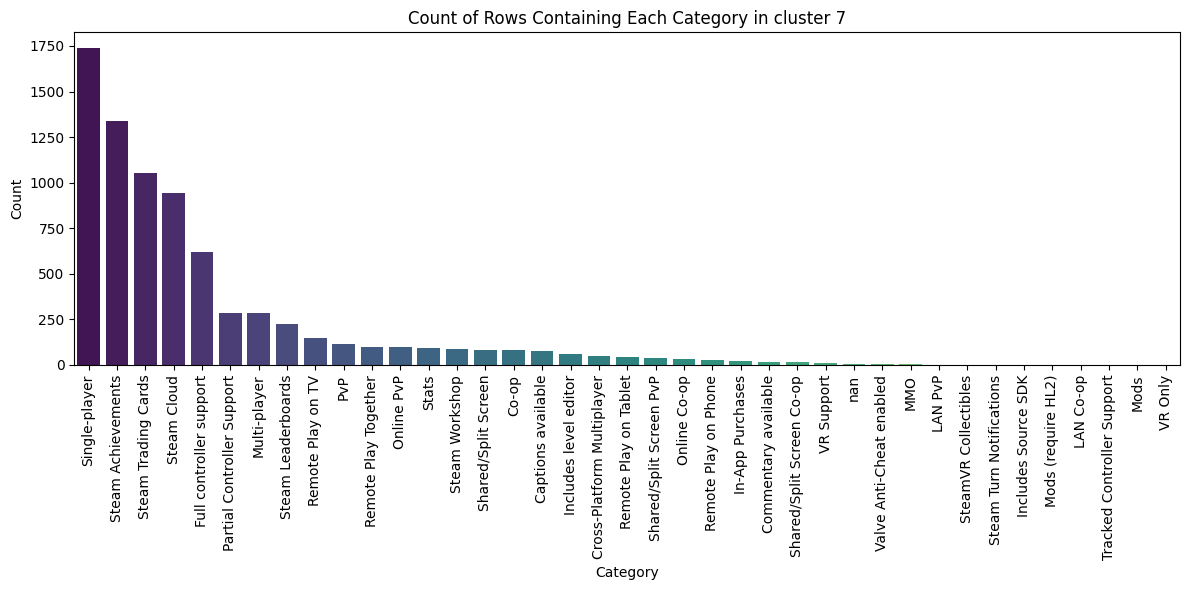

In [225]:
# Count how many times each genre appears in any list
cat_counts = {genre: df_c7['Categories'].apply(lambda x: genre in x).sum() for genre in unique_categories}

# Convert to a DataFrame for easier plotting
cat_counts_df = pd.DataFrame(list(cat_counts.items()), columns=['Category', 'Count'])

# Sort by count for a cleaner plot
cat_counts_df = cat_counts_df.sort_values(by='Count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=cat_counts_df, x='Category', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Category in cluster 7')
plt.tight_layout()
plt.show()

C:\Users\sayex\AppData\Local\Temp\ipykernel_16036\756584209.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_counts_df, x='Category', y='Count', palette='viridis')


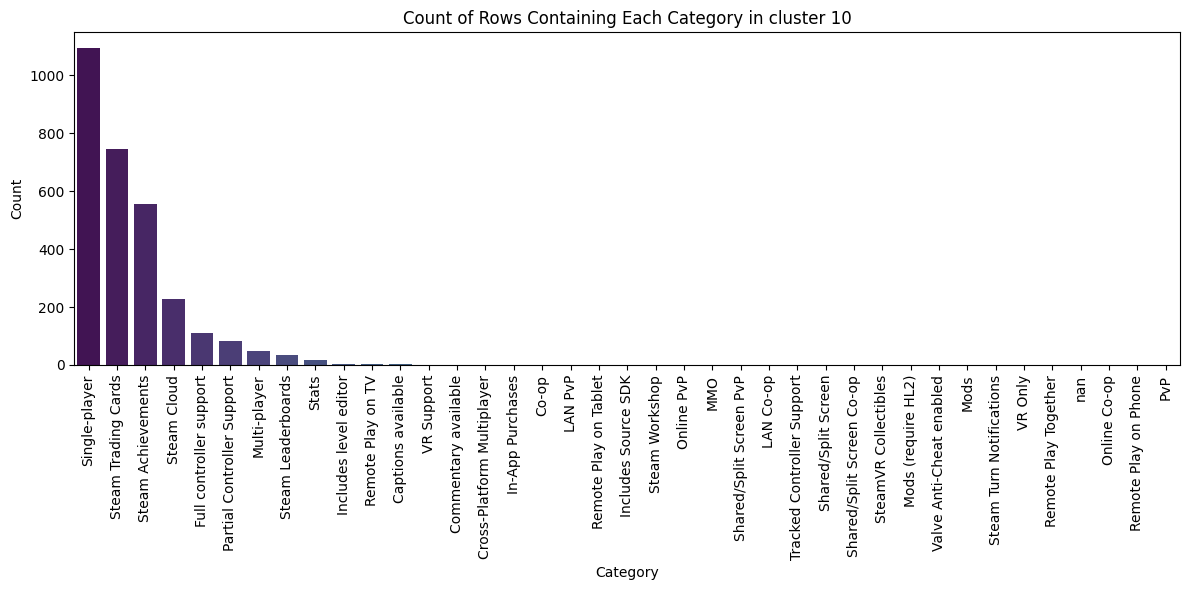

In [226]:
# Count how many times each genre appears in any list
cat_counts = {genre: df_c10['Categories'].apply(lambda x: genre in x).sum() for genre in unique_categories}

# Convert to a DataFrame for easier plotting
cat_counts_df = pd.DataFrame(list(cat_counts.items()), columns=['Category', 'Count'])

# Sort by count for a cleaner plot
cat_counts_df = cat_counts_df.sort_values(by='Count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=cat_counts_df, x='Category', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Rows Containing Each Category in cluster 10')
plt.tight_layout()
plt.show()

## Storytelling

Many of the clusters made had a lot of overlap, which was expected. The columns 'Genres', 'Tags', and 'Categories' contain lists in the dataframe, and have multiple entries, and entries like 'Action', 'Adventure', and 'Single-Player' are very common. However, Out of the clusters visualized, cluster 10 seemed to be more casual games instead of the action packed games found in clusters 3 and 7. Clusters 7 seemed to primarily be singleplayer games with many of them being story driven, while in cluster 3, there was not as strong of a focus put on story.

## Impact

The clearest use for this dataset would be to reccommend video games to users based on what other games are in the same cluster as the game a user plays. Similar to Steam's 'MORE LIKE THIS' section. One thing that I tried to avoid was punishing short (less than 5 hours) narrative games, but I still wanted to shorten the dataframe, so I removed games that did not have a median playtime forever of an hour or more. There are games, however, that are meant to be completed in less than an hour, and thus are unlikely to be included in the clustered data. Also, new games that few have played do not appear in the clustered dataset. Those games that do not appear in hte clustered dataset would not be reccommended to users if this were to be used with a reccommender system.

## Resources

1. [data](https://www.kaggle.com/datasets/mexwell/steamgames)